In [1]:
from compare import RESULTS_FILE_NAME, INPUT_FILE_NAME, ALGORITHMS, LABELS, FIG_DIR, KS, ALG_OLD, load_all_inputs, load_all_results
from compare_penalties import RUN_PENALTIES, RESULTS_FILE_NAME as PENALTY_RESULTS_FILE_NAME
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.family"] = "serif"

In [2]:
results = load_all_results("../" + RESULTS_FILE_NAME)
print(list(results)[0])
print(len(results))

penalty_results = load_all_results("../" + PENALTY_RESULTS_FILE_NAME)
print(list(penalty_results)[0])
print(len(penalty_results))

inputs = list(map(lambda x: tuple(x.split()), load_all_inputs("../" + INPUT_FILE_NAME)))
print(*inputs, sep="\n")

('loac', 'spneumoniae.fa', 23, False, 15)
170
('loac', 'spneumoniae.fa', 31, False, 1)
413
('spneumoniae.fa', '128', '15')
('ecoli.fna', '128', '16')
('scerevisiae.fna', '128', '15')
('ngono_pangenome_RASE_db.unitigs_k128.fa', '128', '9')
('spneumo_pangenome_RASE_db.unitigs_k128.fa', '128', '9')
('sars-cov-2_pangenome_gisaid.unitigs_k128.fa', '96', '10')
('celegans.fa', '64', '14')
('dmelanogaster.fna', '64', '14')
('human_microbiome_illumina_srs063932.unitigs_minfreq2_k32.fa', '32', '7')
('ecoli_pangenome_661k_HQ.unitigs_k128.fa', '32', '7')
('human_genome_assembly_chm13.v2.0.fa', '32', '12')


In [3]:
def print_fixed_k_run_penalties(inp, k):
    print(inp)
    inp = inp[0]
    
    fig, axs = plt.subplots(2, 3)
    fig.set_figheight(12)
    fig.set_figwidth(18)
    
    for alg in ALGORITHMS:
        for complements in (False, True):
            ys = [list() for label in LABELS]
            best_penalty = (0, 100)
            for run_penalty in RUN_PENALTIES:
                if (alg == ALG_OLD): run_penalty = None
                if not (alg, inp, k, complements, run_penalty) in penalty_results.keys(): continue

                d = penalty_results[(alg, inp, k, complements, run_penalty)]
                for i in range(len(LABELS)):
                    ys[i].append(d[LABELS[i]])

                if (d[LABELS[5]] < best_penalty[1]): best_penalty = (run_penalty, d[LABELS[5]])
        
            # print(alg, (len(ys[0]), len(RUN_PENALTIES)))
            for i, label in enumerate(LABELS):
                sns.lineplot(y=ys[i], x=RUN_PENALTIES[:len(ys[0])], ax=axs[i // 3, i % 3],
                                marker="o" if complements else "s", markeredgewidth=0,
                                label=alg + ("(c)" if complements else ""))
    
    fig.suptitle(f"{inp}, k = {k}, best run-penalty = {best_penalty[0]}")
    
    for i, label in enumerate(LABELS):
        ax = axs[i // 3, i % 3]
        ax.set_title(label)
        ax.set(xticks=RUN_PENALTIES[::5])


('spneumoniae.fa', '128', '15')
('ecoli.fna', '128', '16')
('scerevisiae.fna', '128', '15')
('ngono_pangenome_RASE_db.unitigs_k128.fa', '128', '9')
('spneumo_pangenome_RASE_db.unitigs_k128.fa', '128', '9')
('sars-cov-2_pangenome_gisaid.unitigs_k128.fa', '96', '10')
('celegans.fa', '64', '14')
('dmelanogaster.fna', '64', '14')


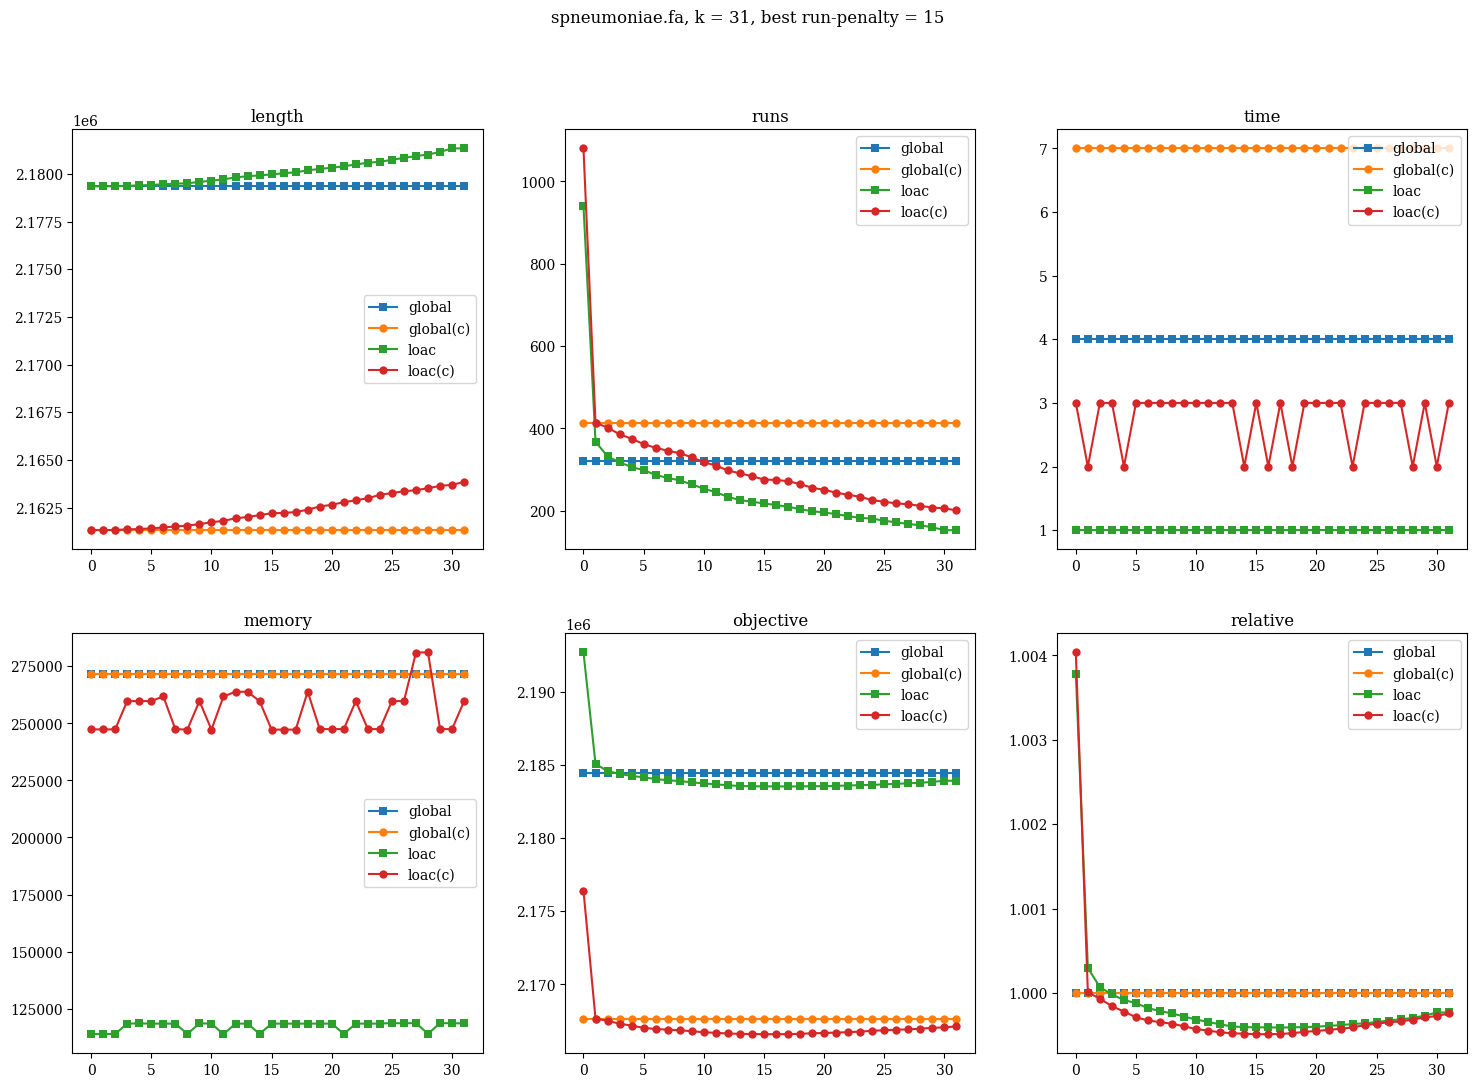

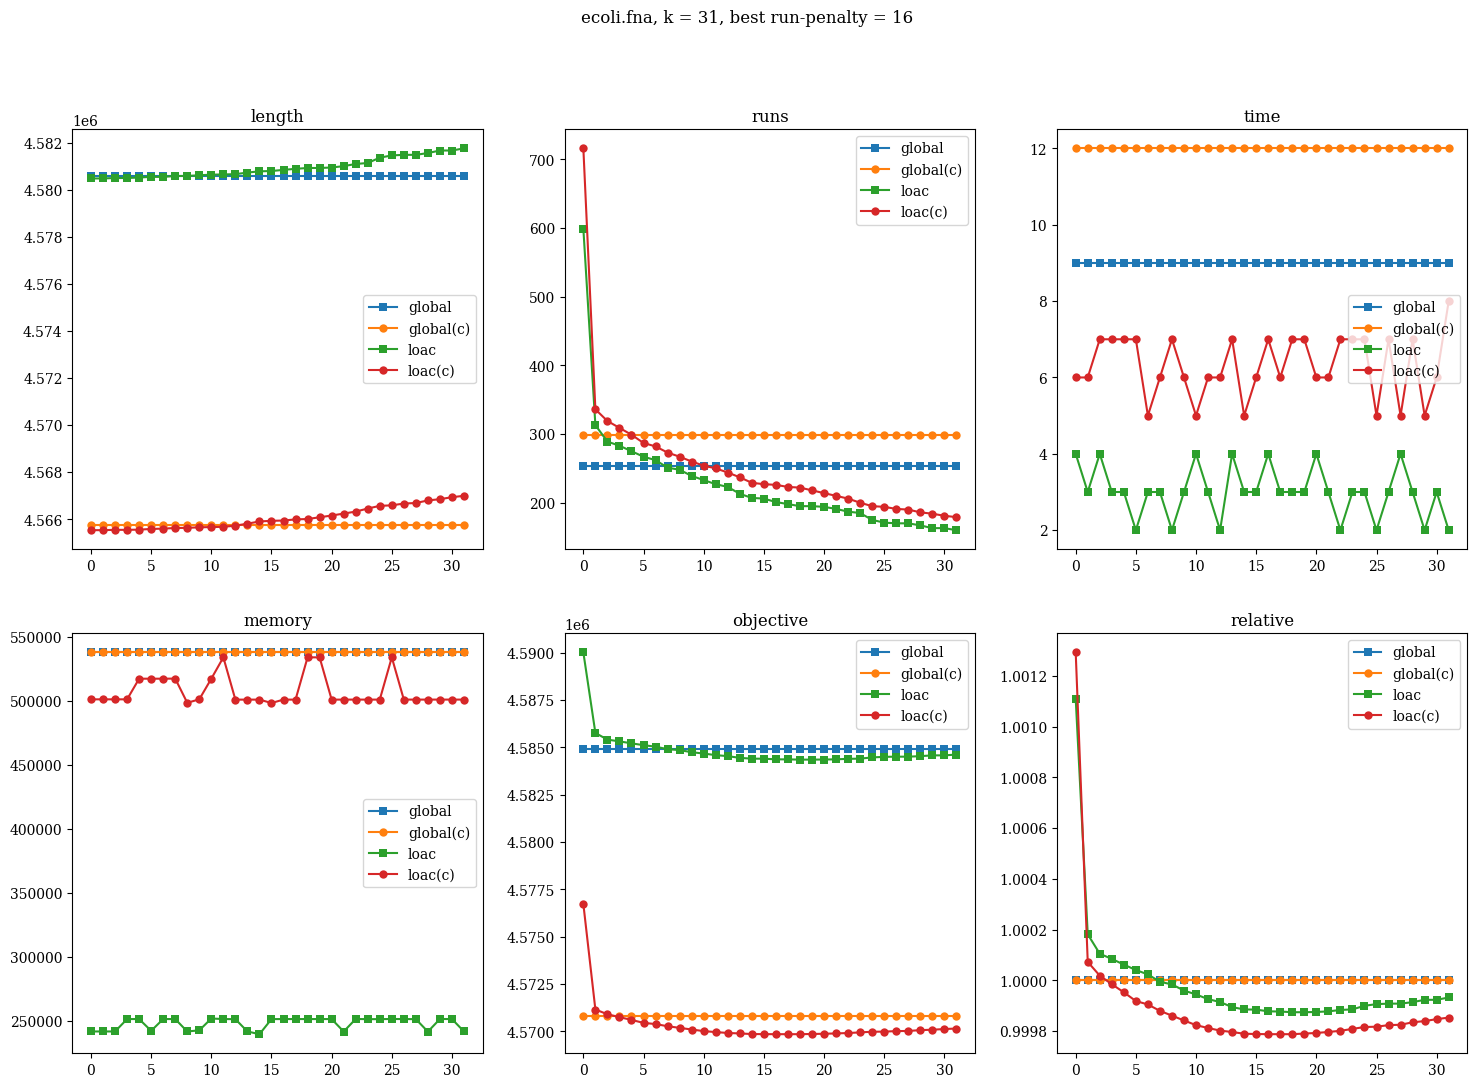

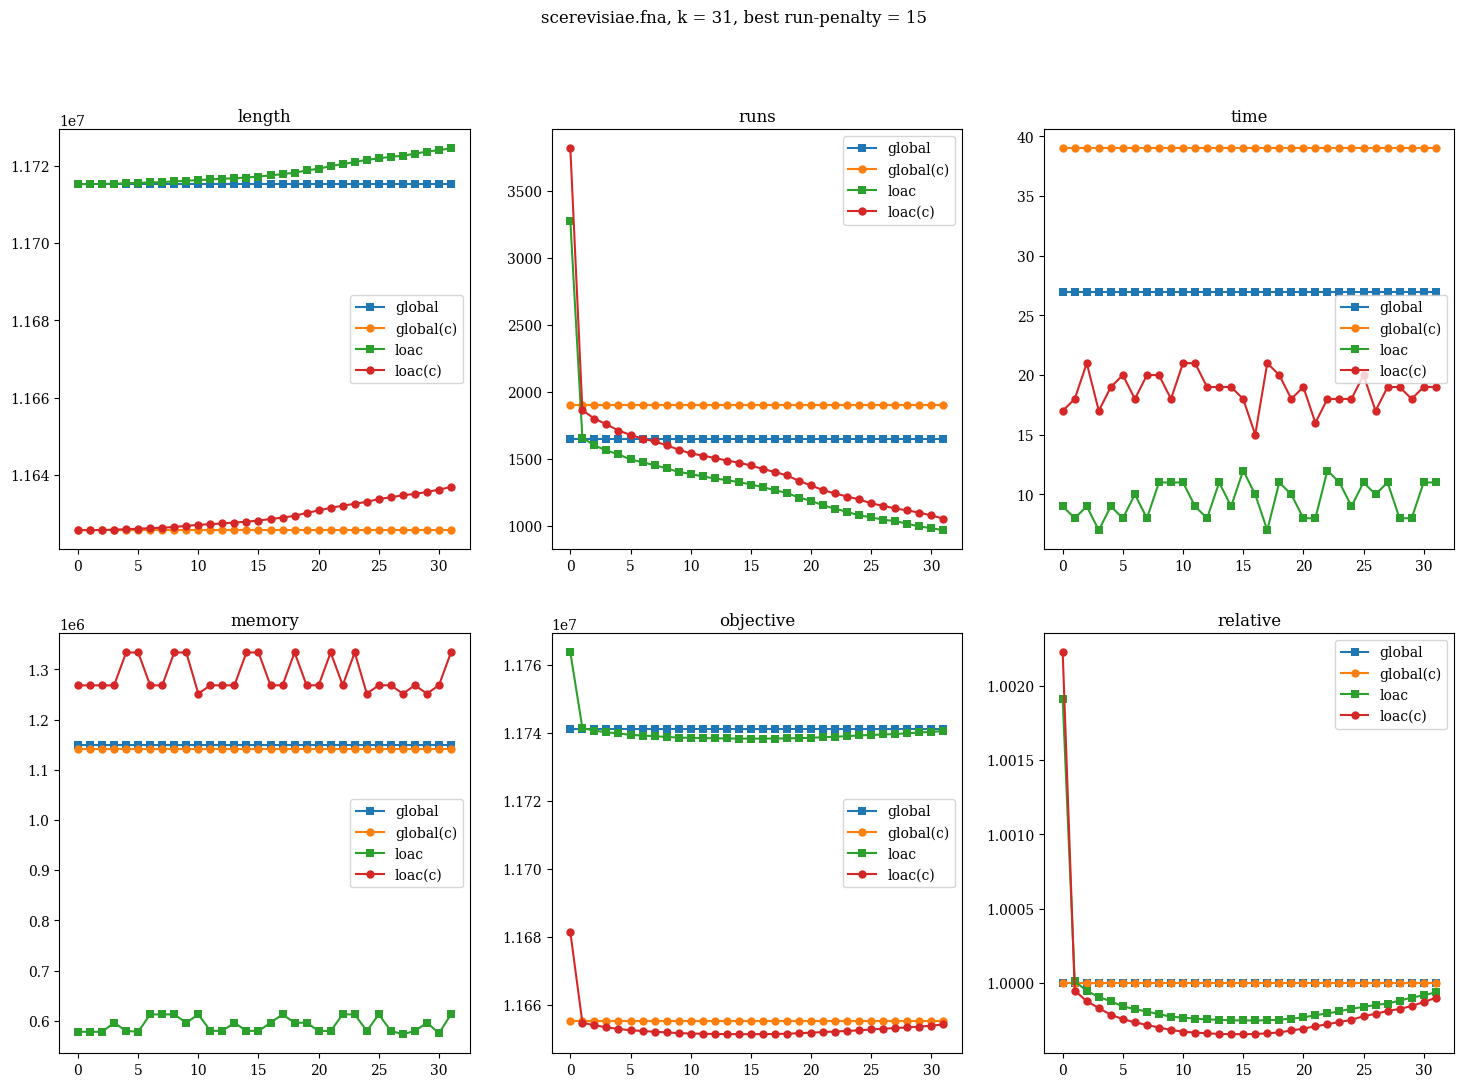

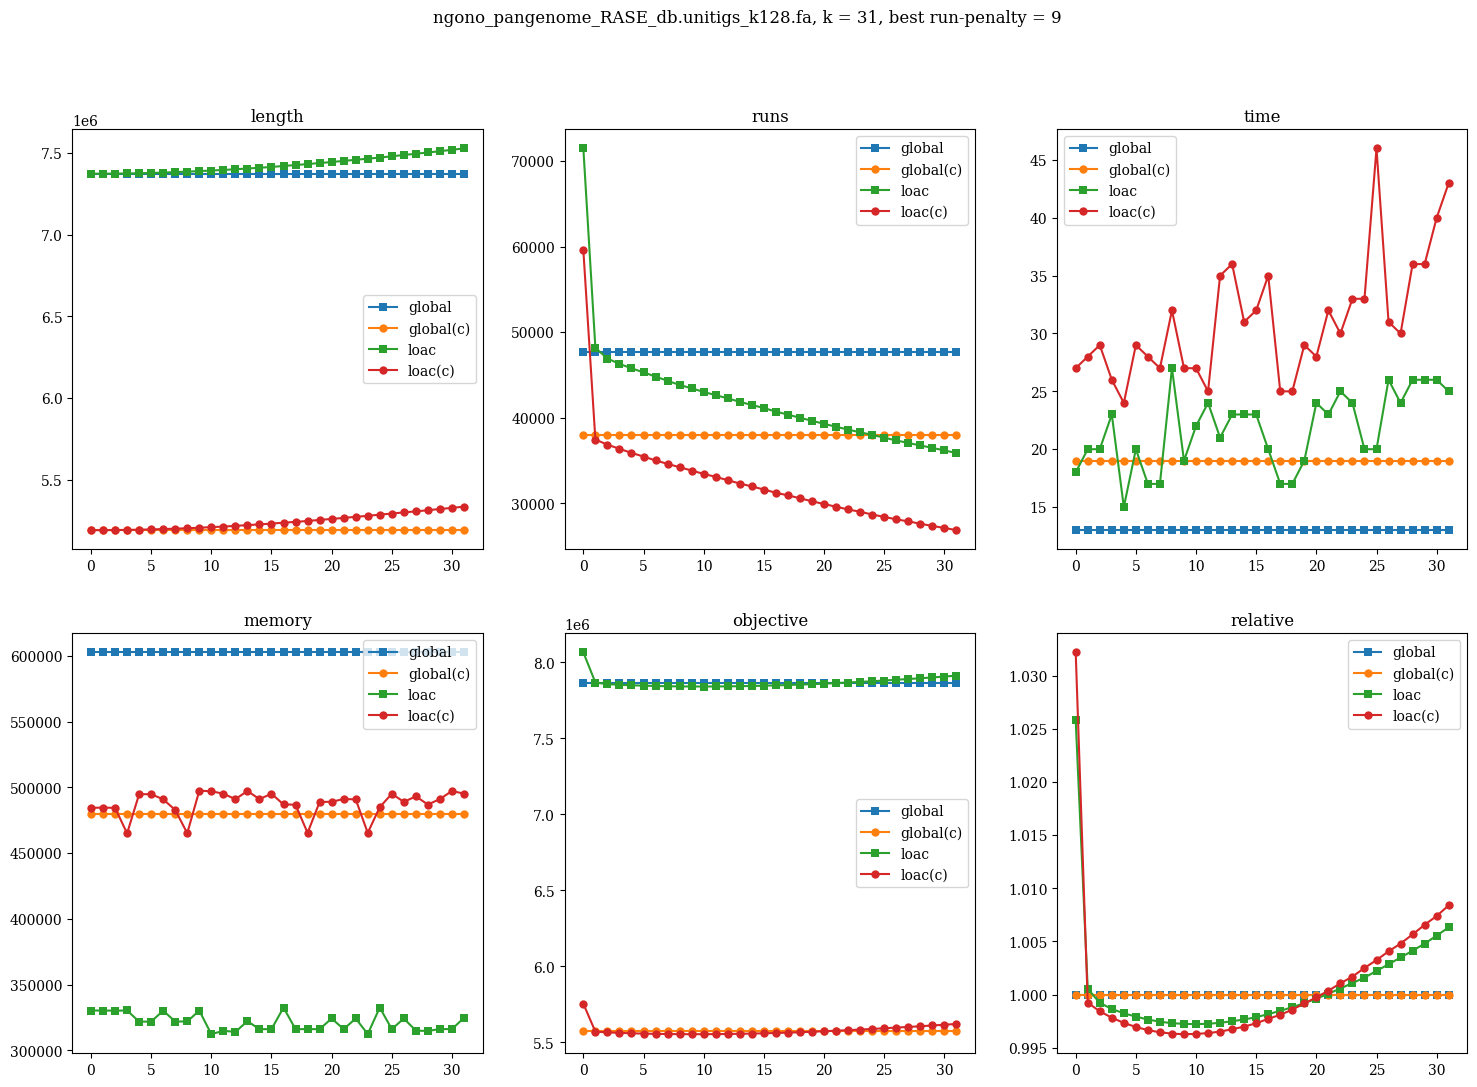

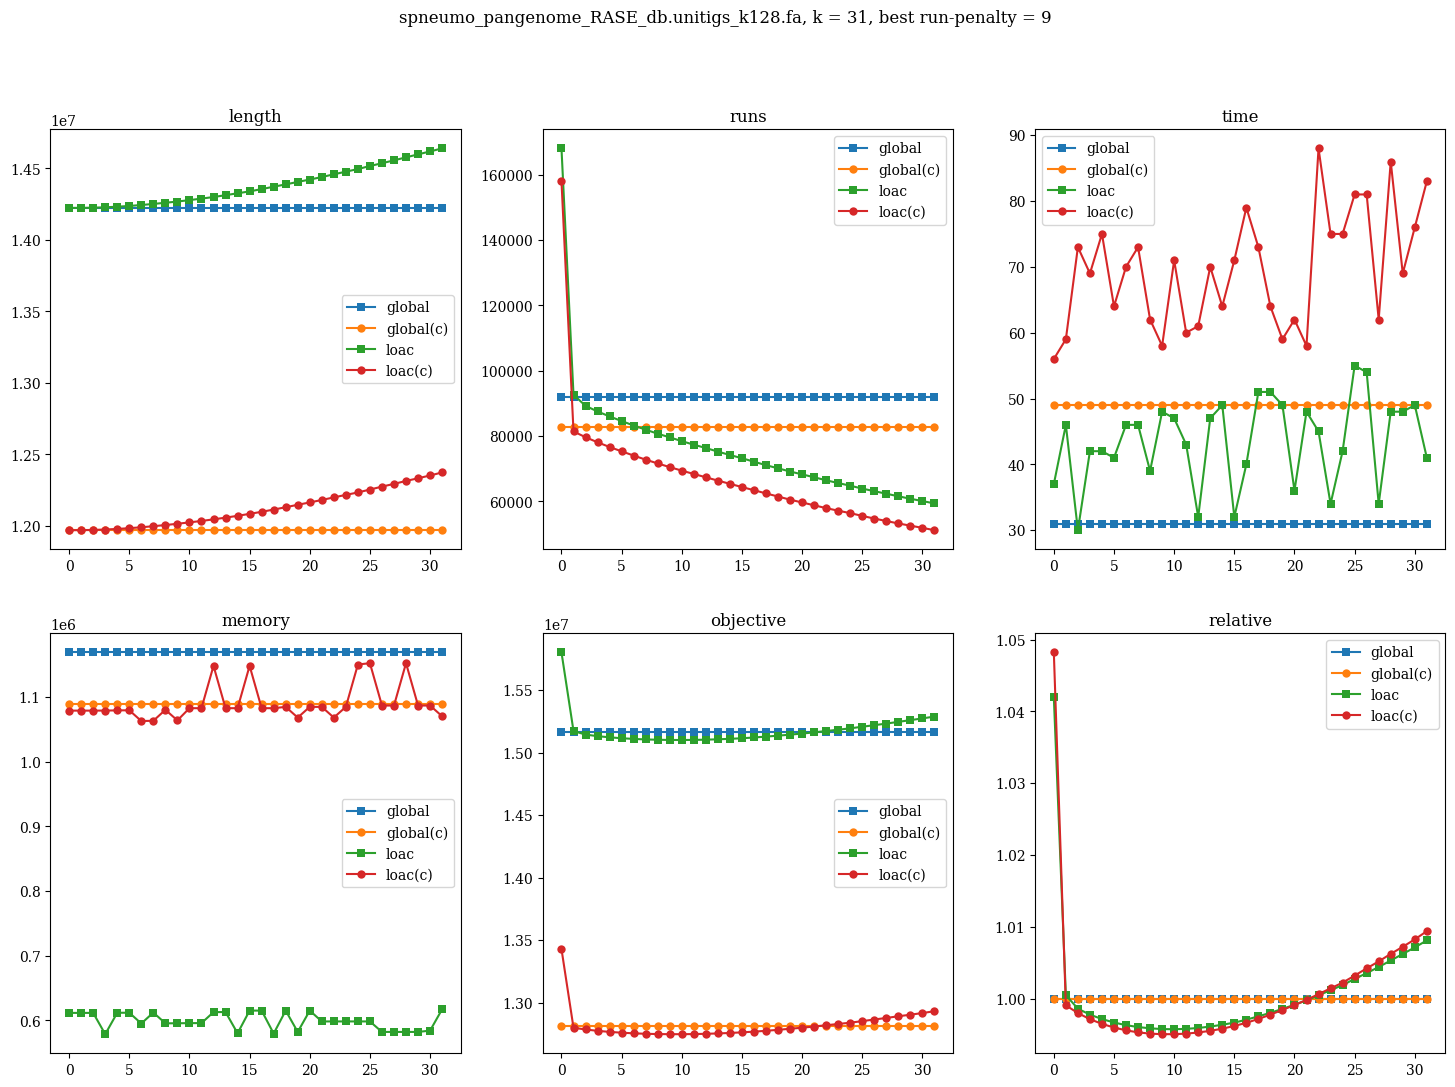

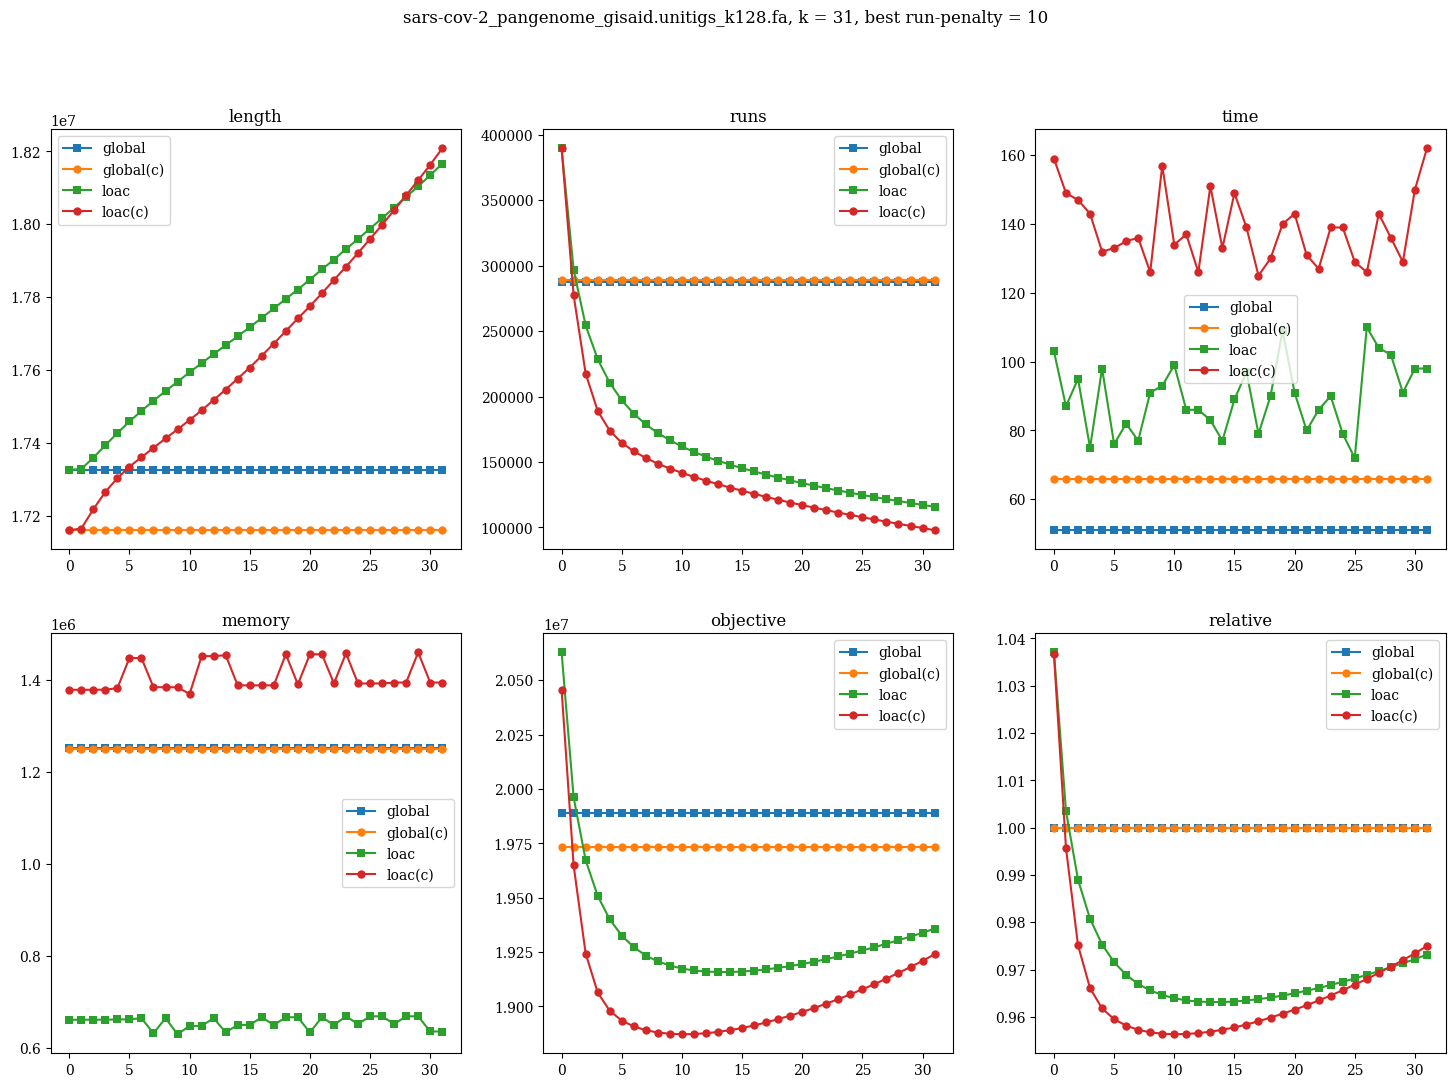

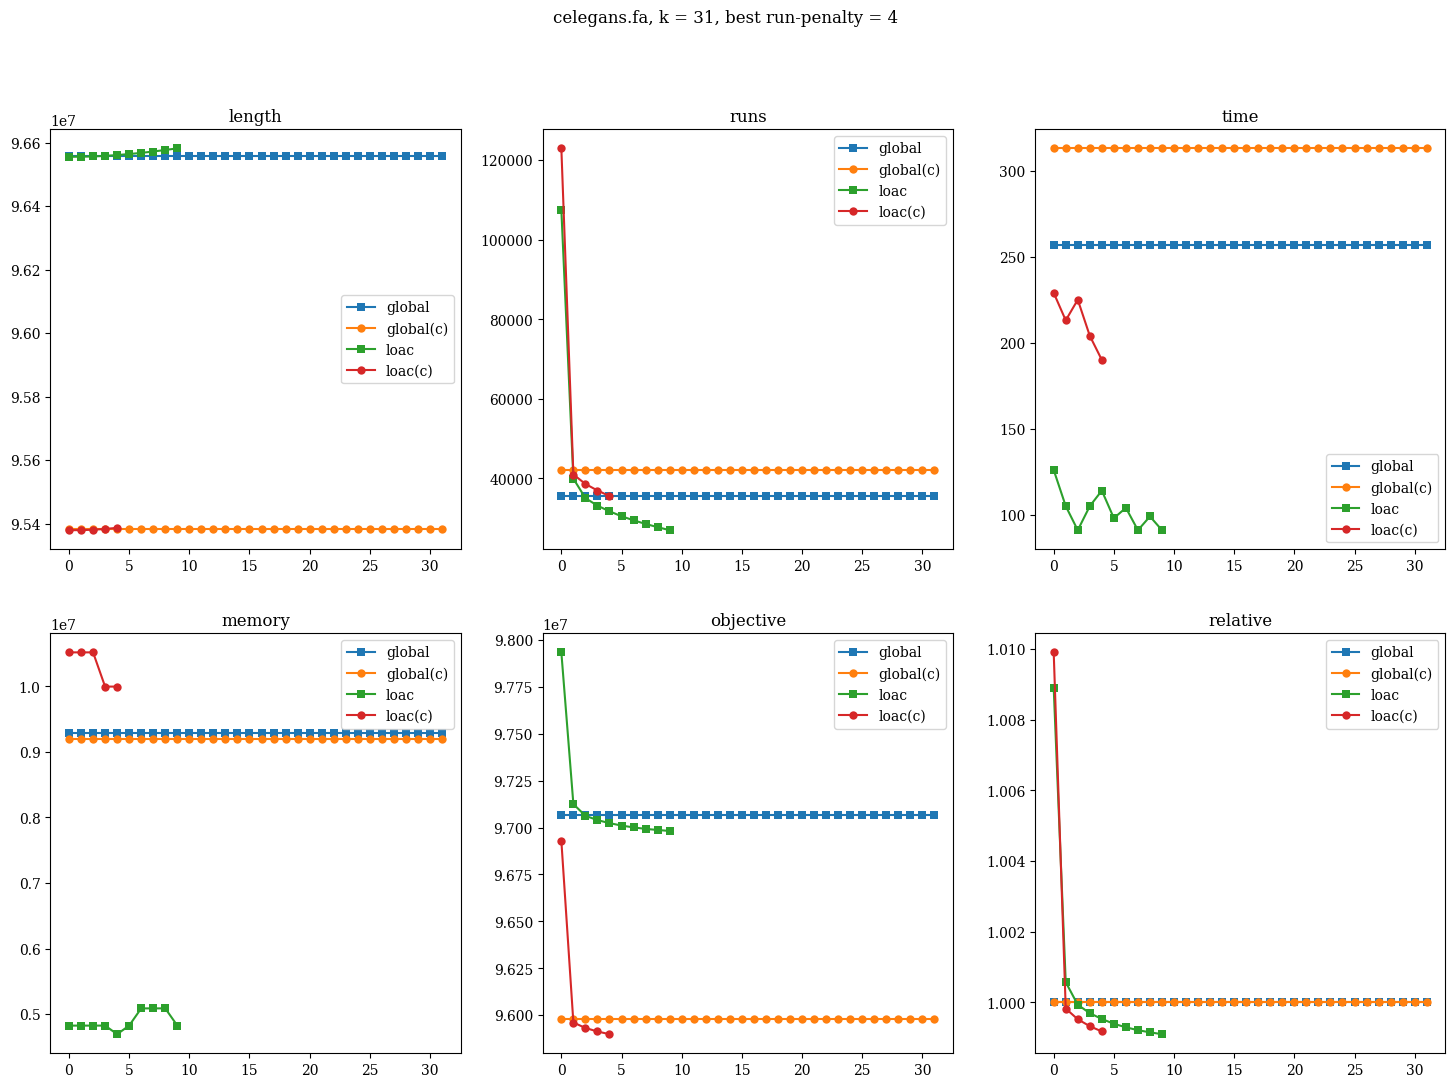

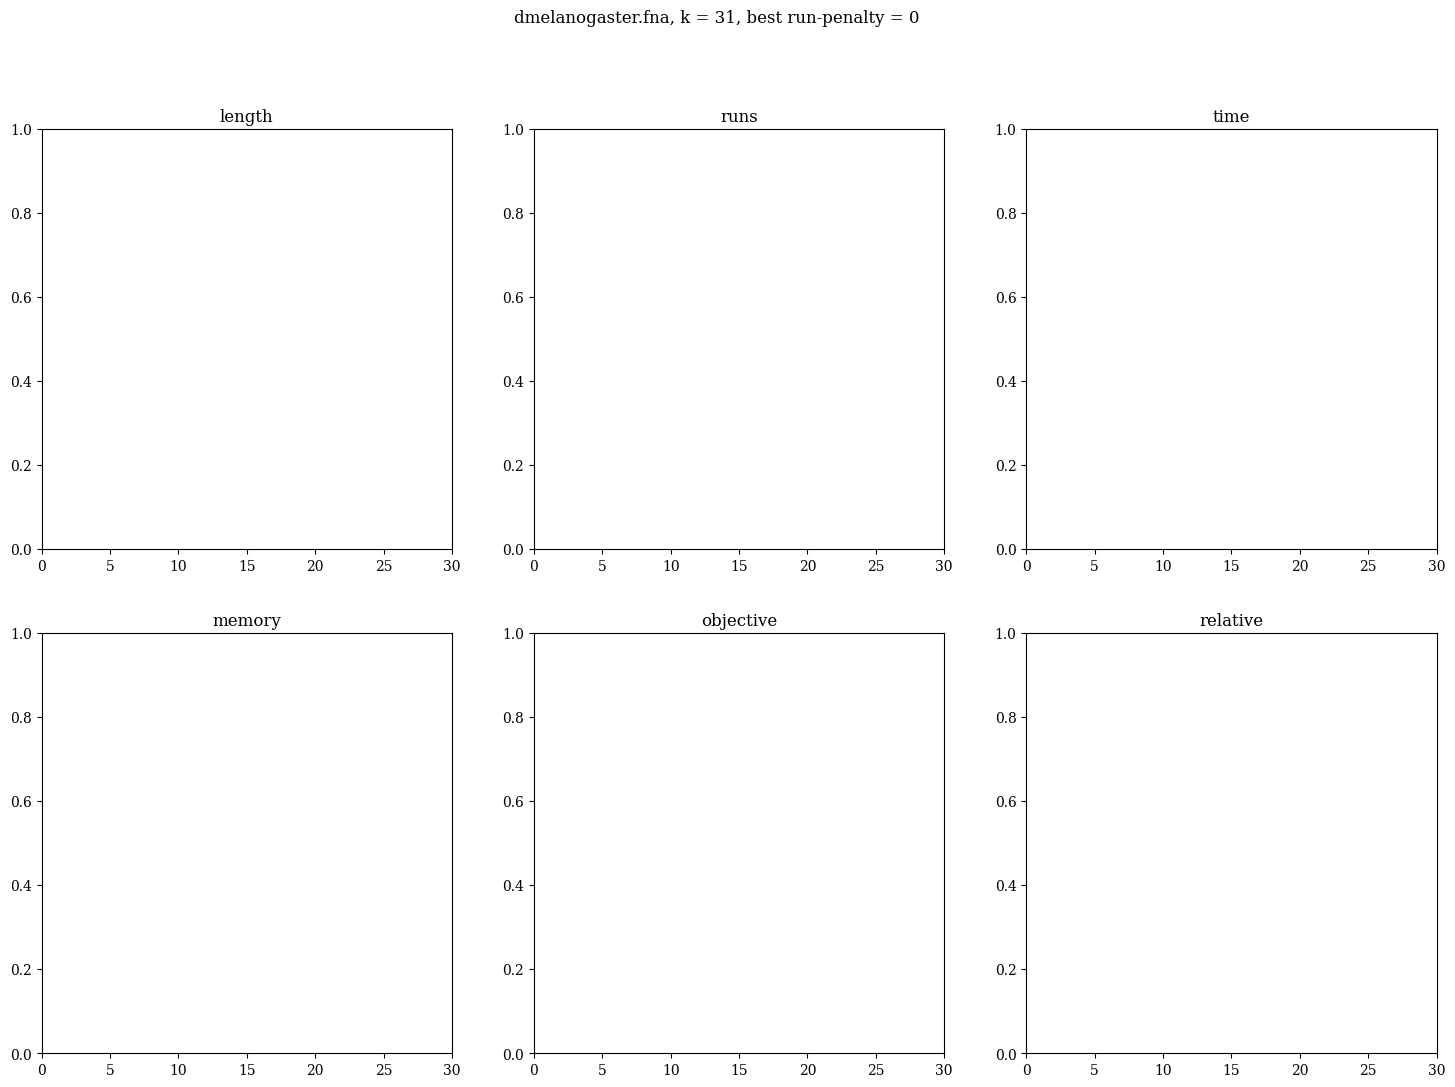

In [4]:
penalty_results = load_all_results("../" + PENALTY_RESULTS_FILE_NAME)
for inp in inputs[:-3]:
    print_fixed_k_run_penalties(inp, 31)

In [5]:

def print_stats_for_input(inp, save=False):
    print(inp)
    run_penalty = int(inp[2])
    inp = inp[0]
    max_xs = []

    fig, axs = plt.subplots(2, 3)
    fig.set_figheight(12)
    fig.set_figwidth(18)
    fig.suptitle(inp)
    for alg in ALGORITHMS:
        rp = run_penalty if alg != ALG_OLD else None
        for complements in (False, True):
            ys, xs = [list() for label in LABELS], []
            for k in KS:
                if not (alg, inp, k, complements, rp) in results.keys(): continue

                d = results[(alg, inp, k, complements, rp)]
                xs.append(k)
                for i in range(len(LABELS)):
                    ys[i].append(d[LABELS[i]])

            if len(xs) > len(max_xs): max_xs = xs
    
            for i, label in enumerate(LABELS):
                sns.lineplot(y=ys[i], x=xs, ax=axs[i // 3, i % 3],
                                marker="o" if complements else "s", markeredgewidth=0,
                                label=alg + ("(c)" if complements else ""))
    
    for i, label in enumerate(LABELS):
        ax = axs[i // 3, i % 3]
        ax.set_title(label)
        ax.set(xticks=max_xs)
    plt.legend()

    if save: fig.savefig(f"../{FIG_DIR}/{inp}.svg")


('spneumoniae.fa', '128', '15')
('ecoli.fna', '128', '16')
('scerevisiae.fna', '128', '15')
('ngono_pangenome_RASE_db.unitigs_k128.fa', '128', '9')
('spneumo_pangenome_RASE_db.unitigs_k128.fa', '128', '9')
('sars-cov-2_pangenome_gisaid.unitigs_k128.fa', '96', '10')
('celegans.fa', '64', '14')
('dmelanogaster.fna', '64', '14')
('human_microbiome_illumina_srs063932.unitigs_minfreq2_k32.fa', '32', '7')
('ecoli_pangenome_661k_HQ.unitigs_k128.fa', '32', '7')
('human_genome_assembly_chm13.v2.0.fa', '32', '12')


/tmp/ipykernel_131394/3817350636.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipykernel_131394/3817350636.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipykernel_131394/3817350636.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


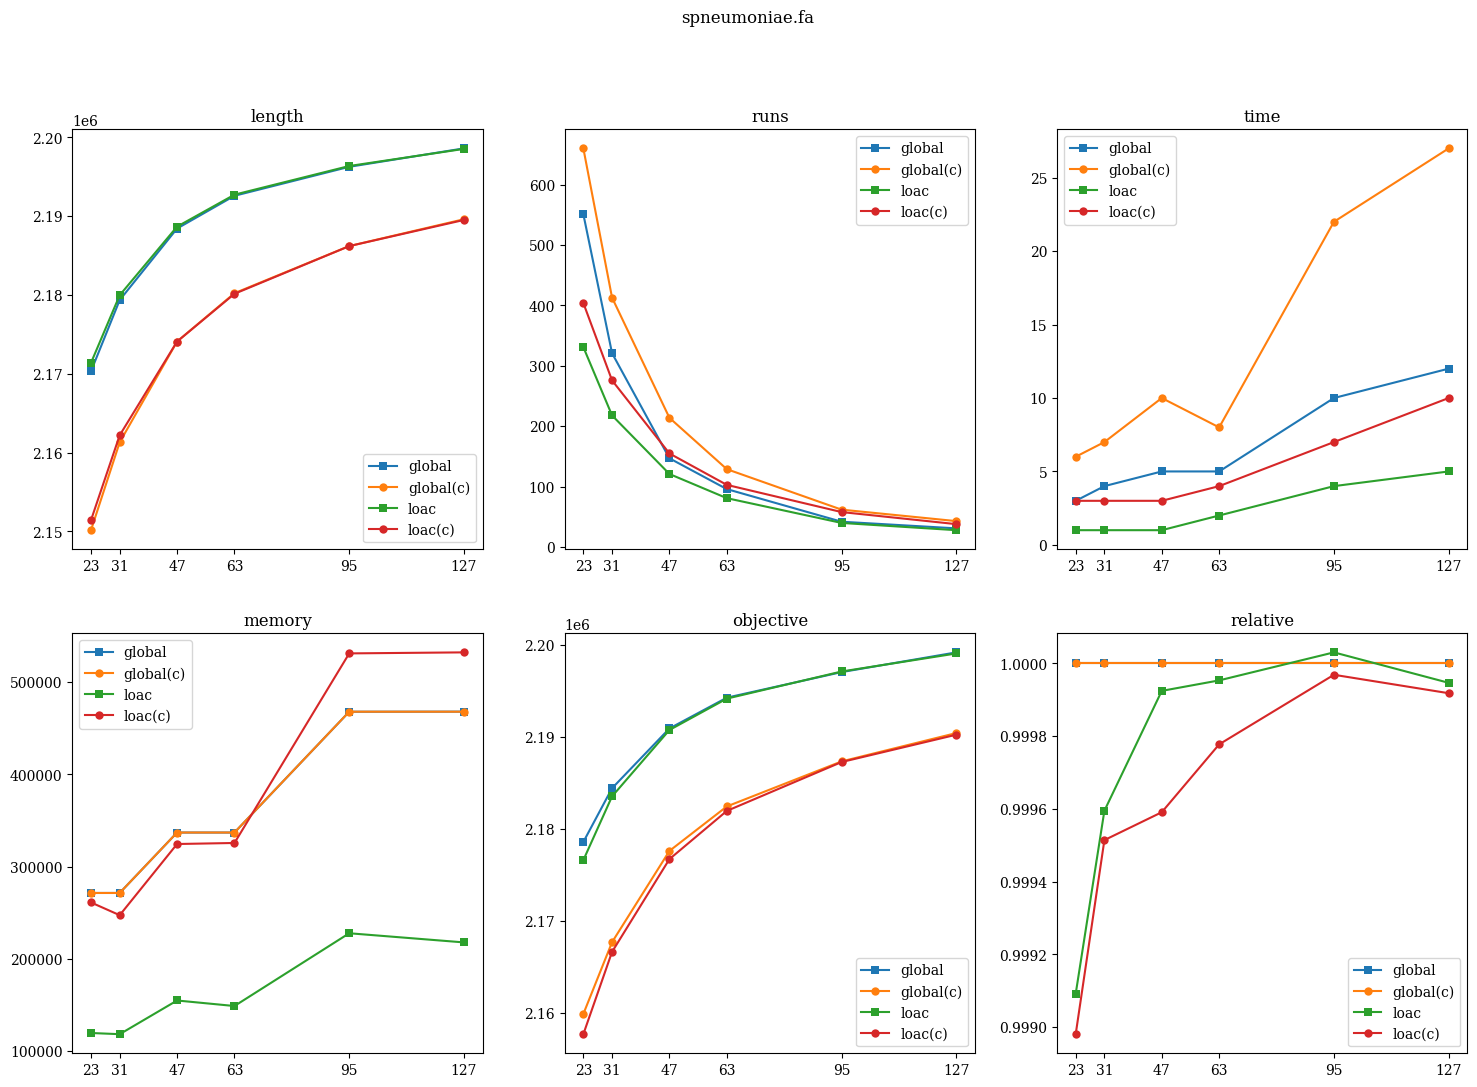

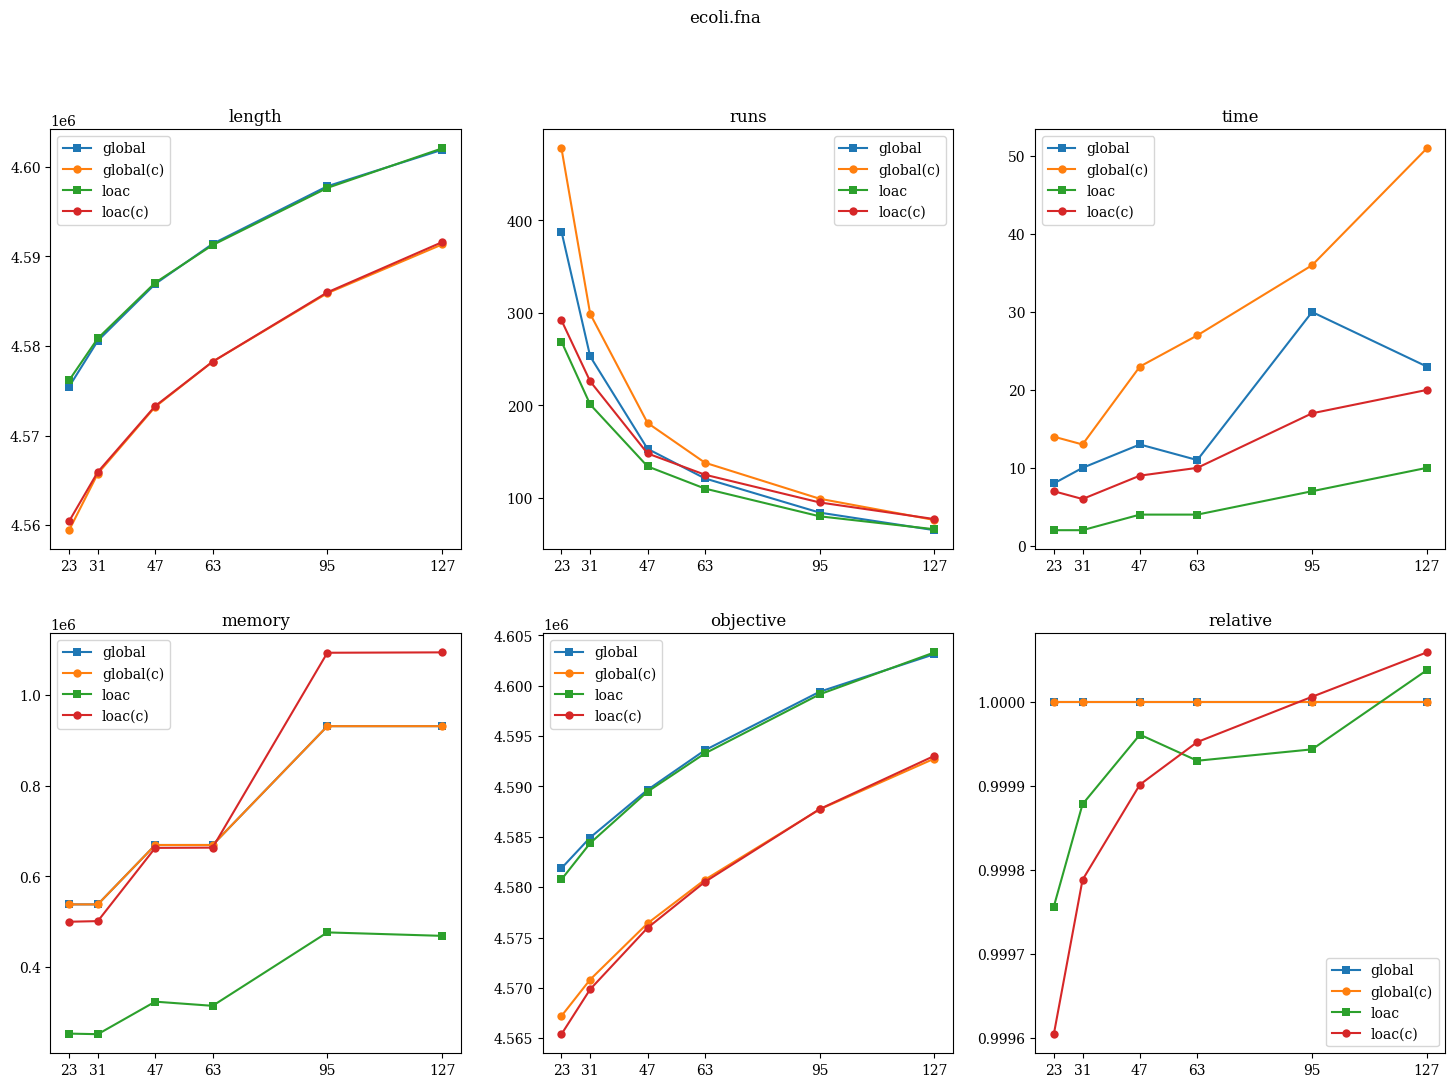

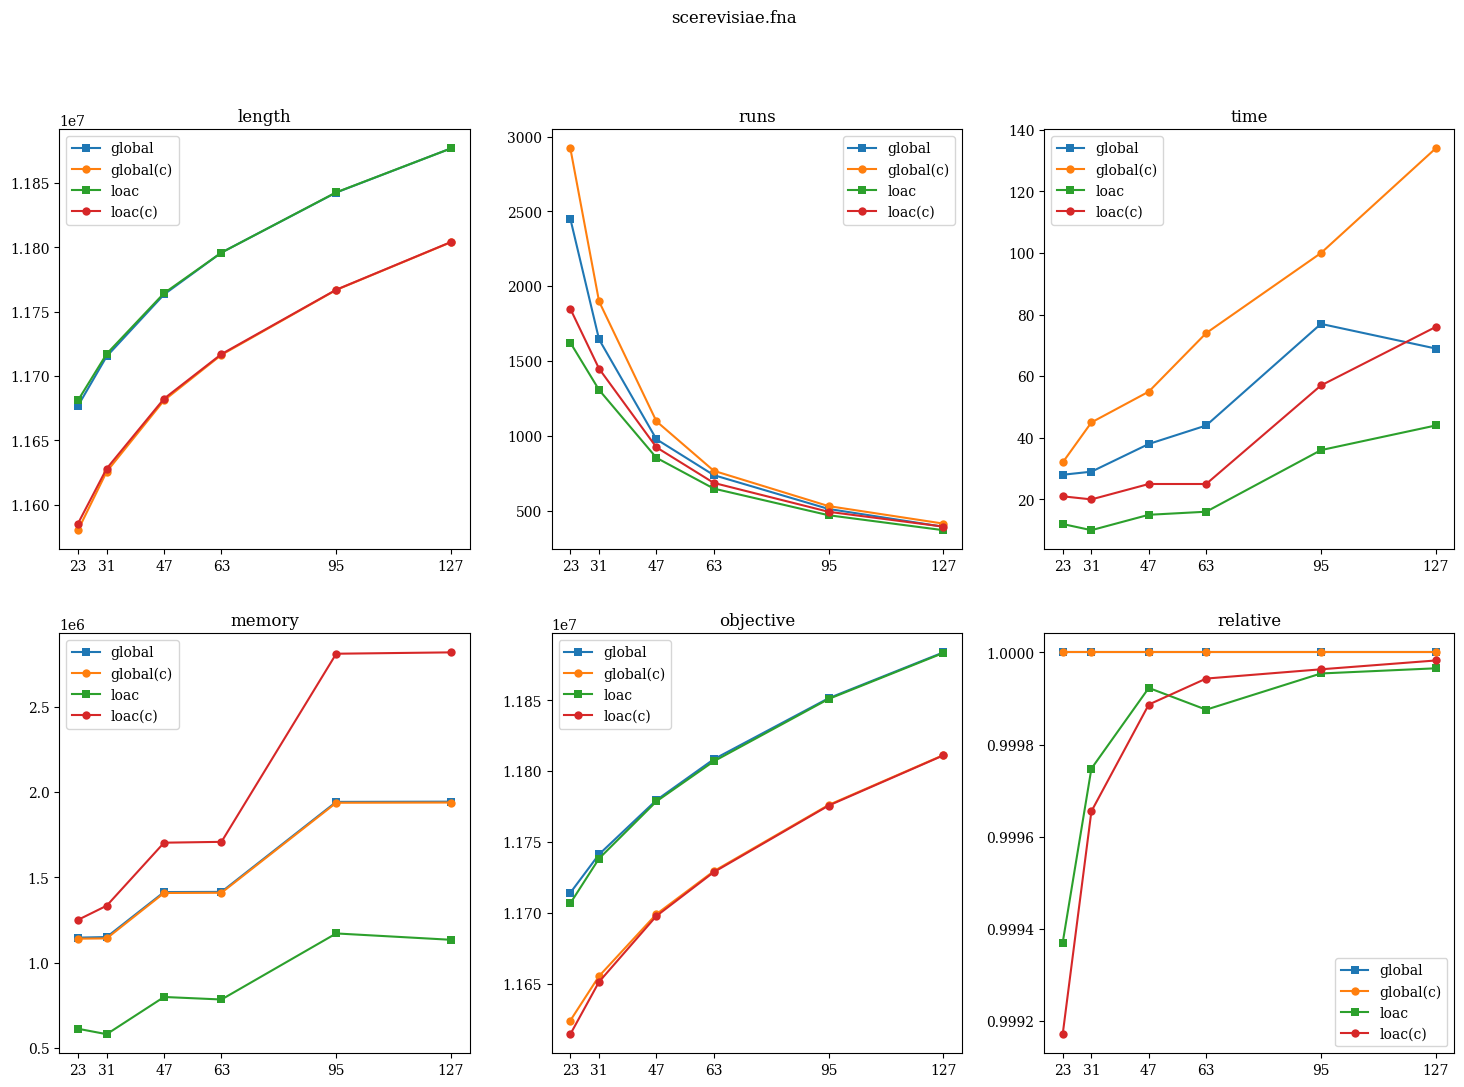

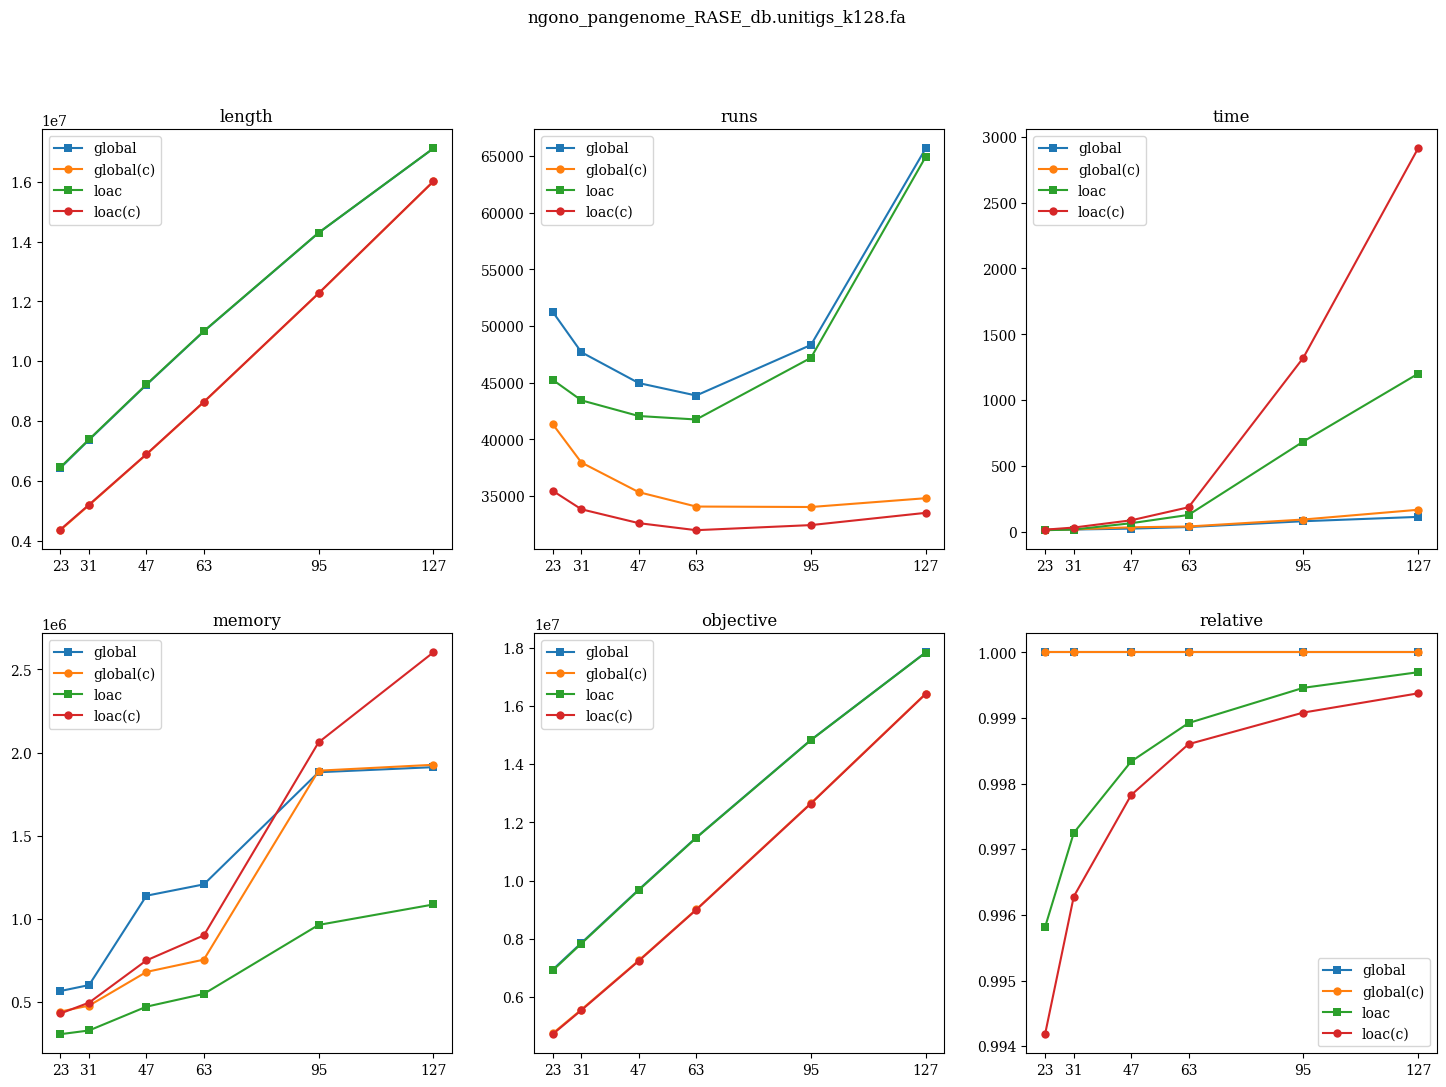

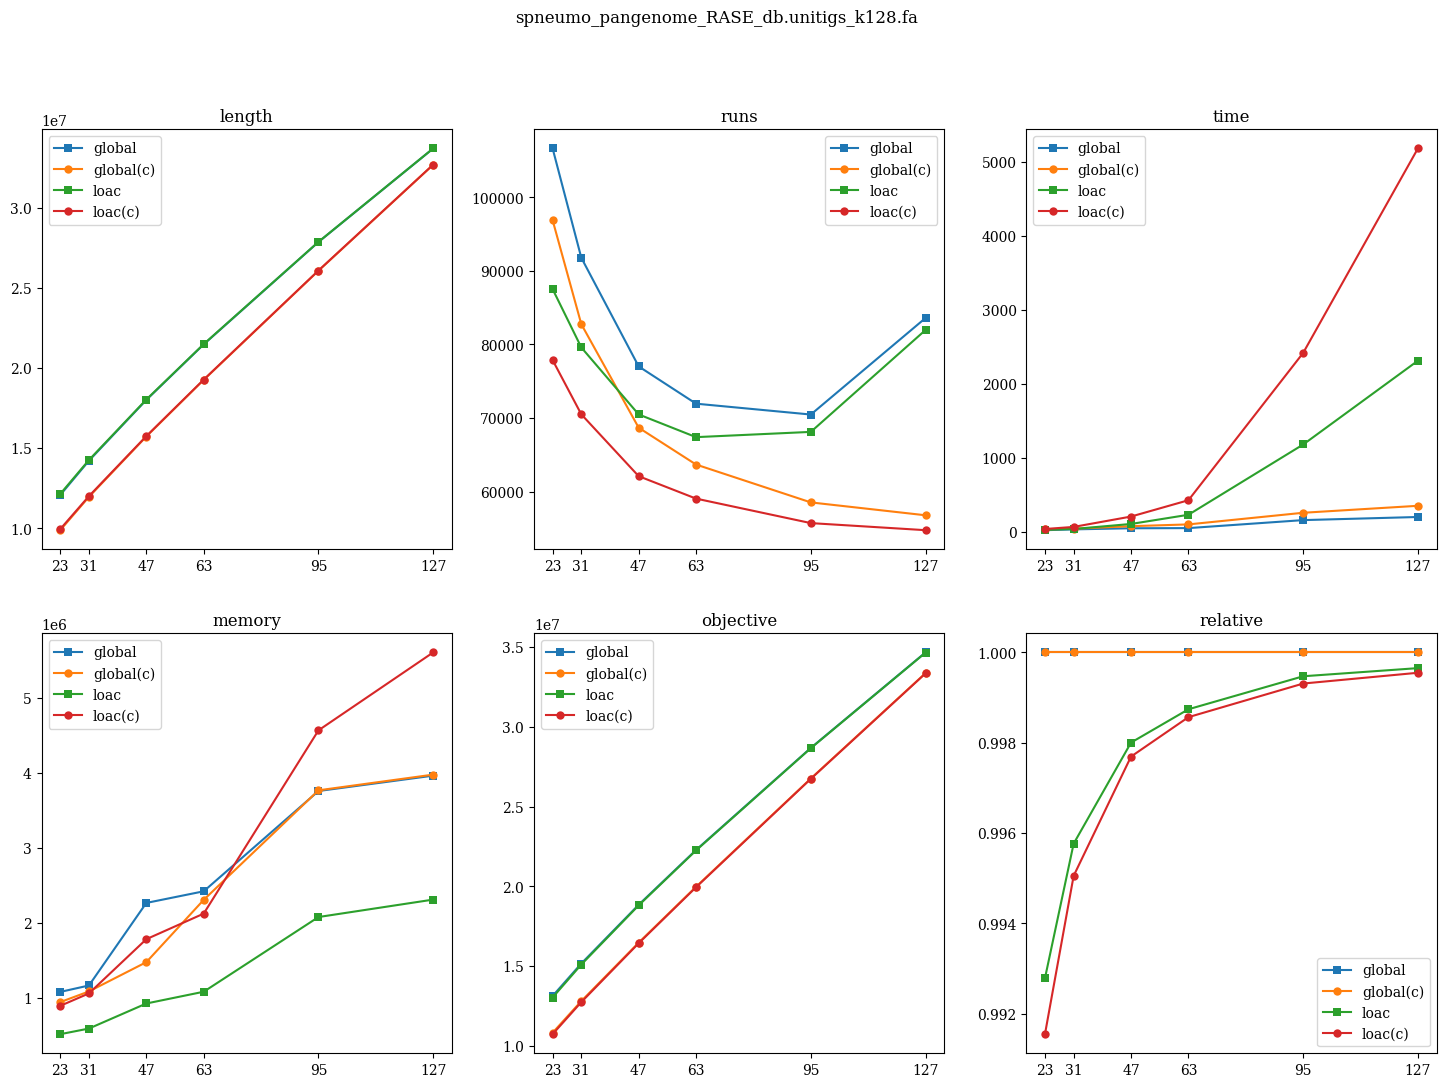

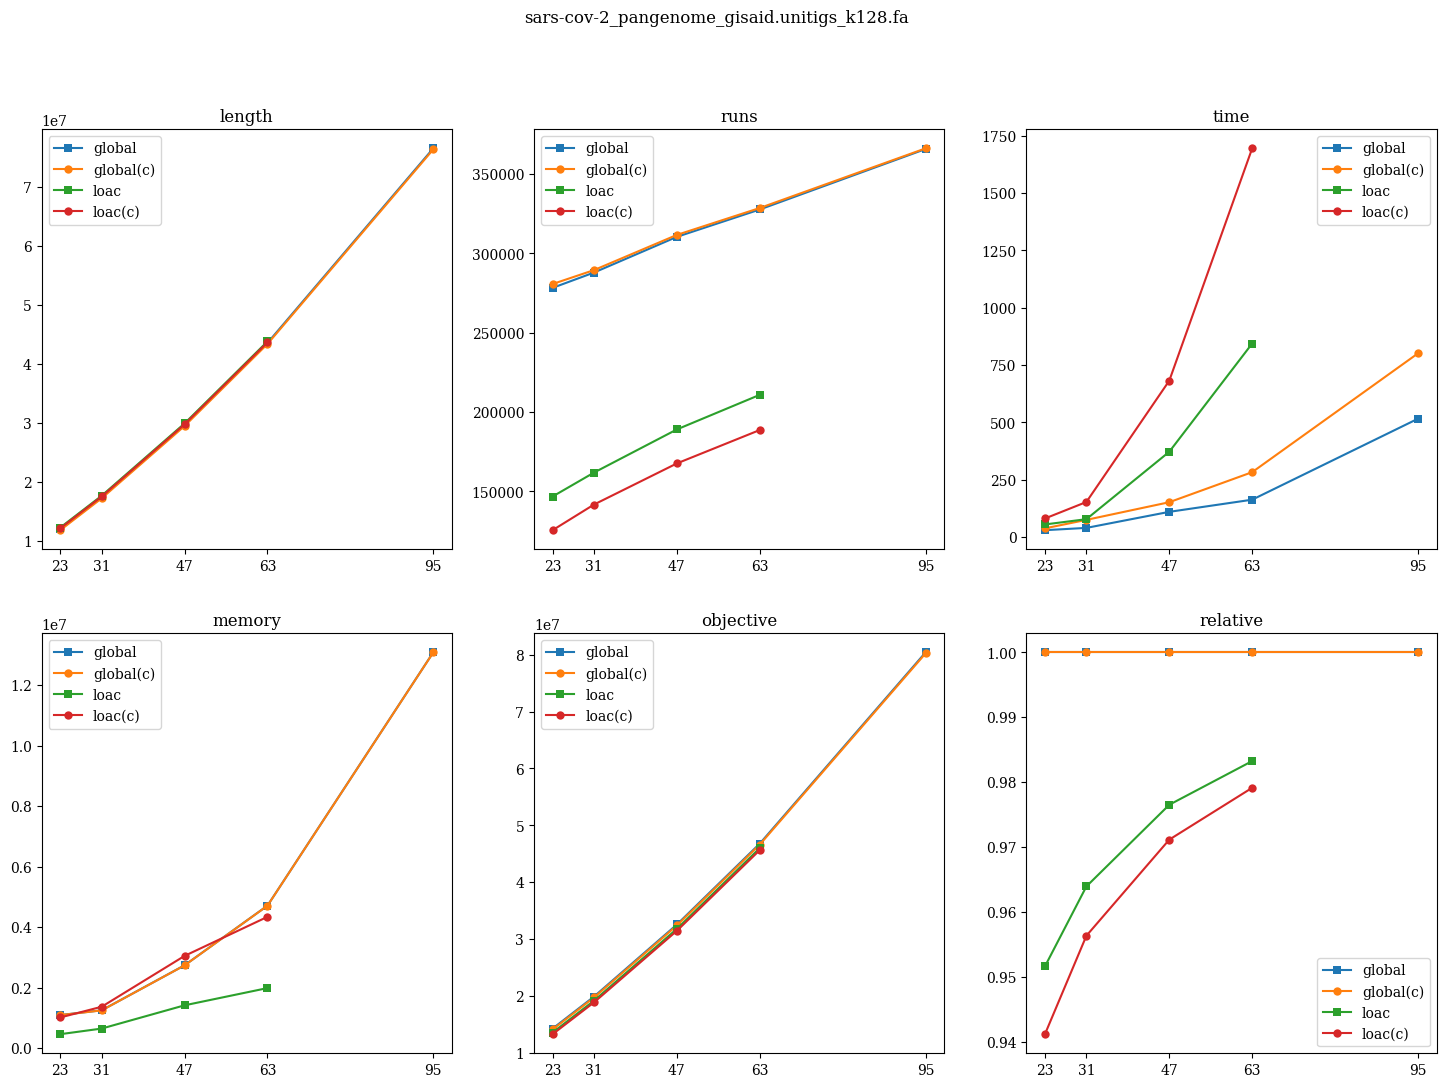

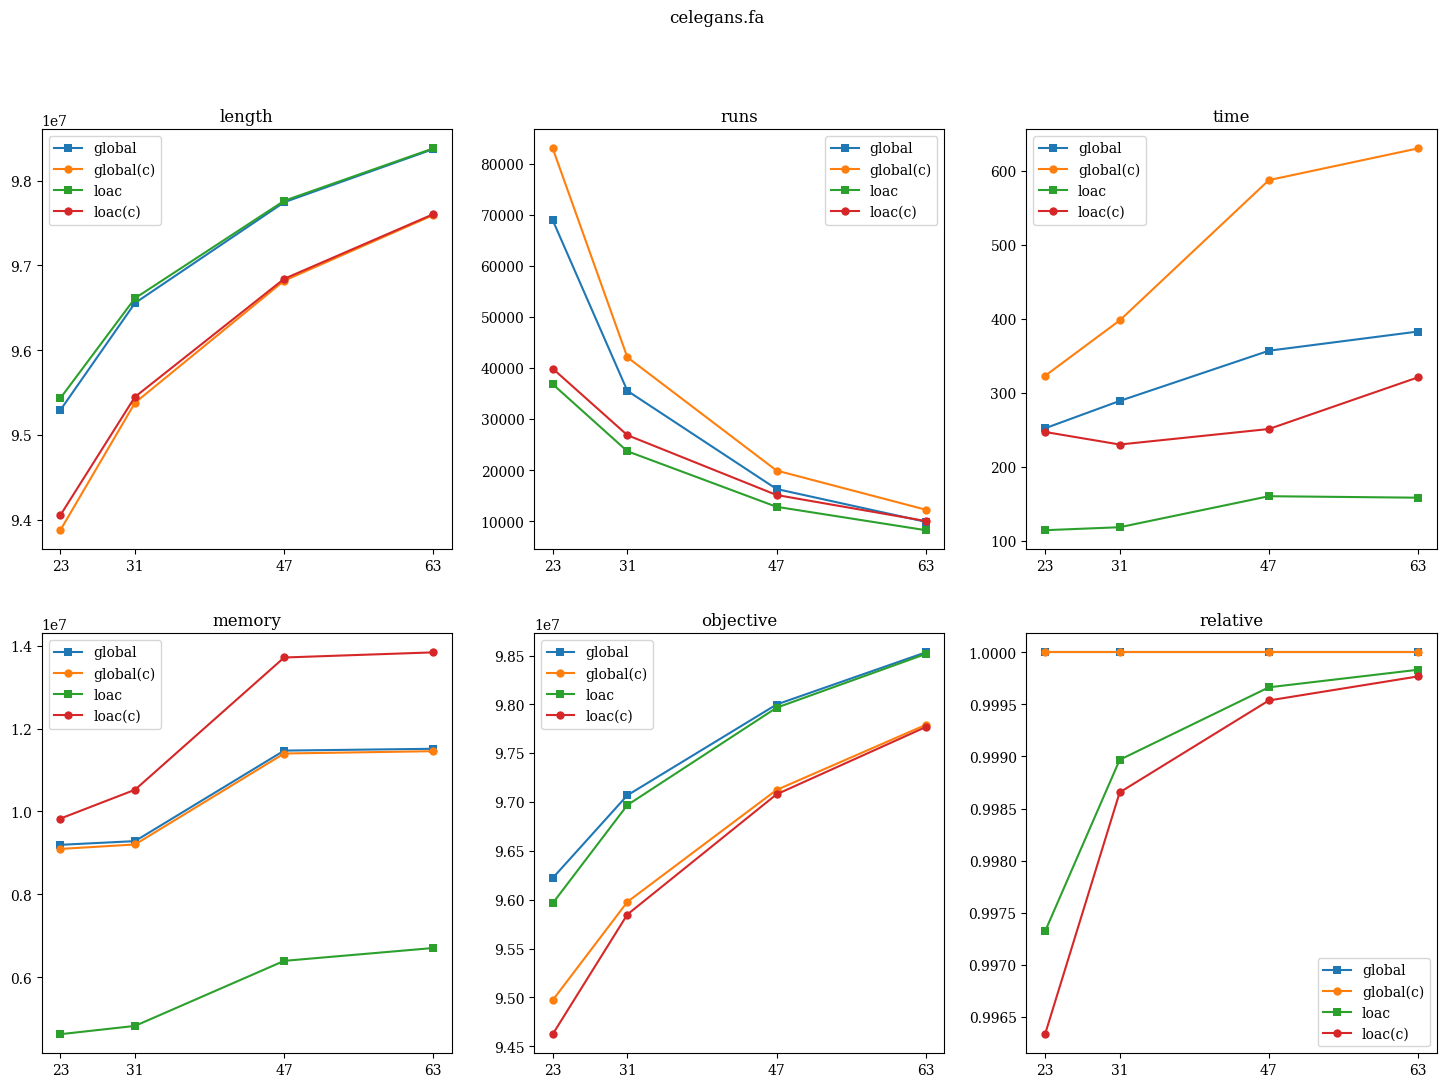

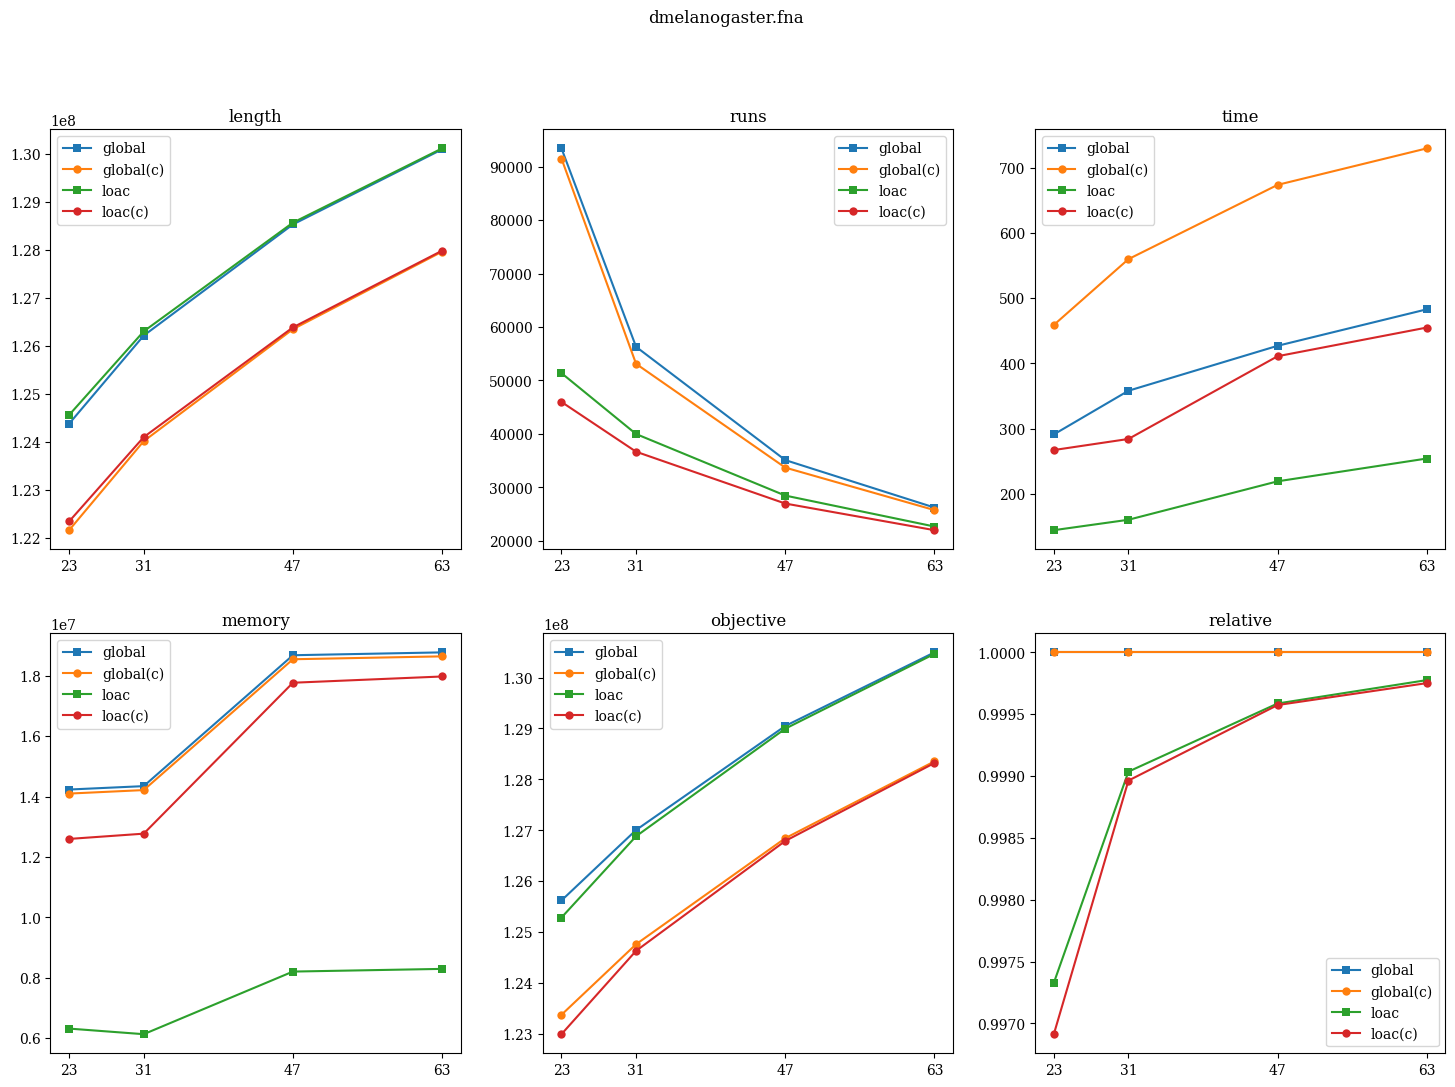

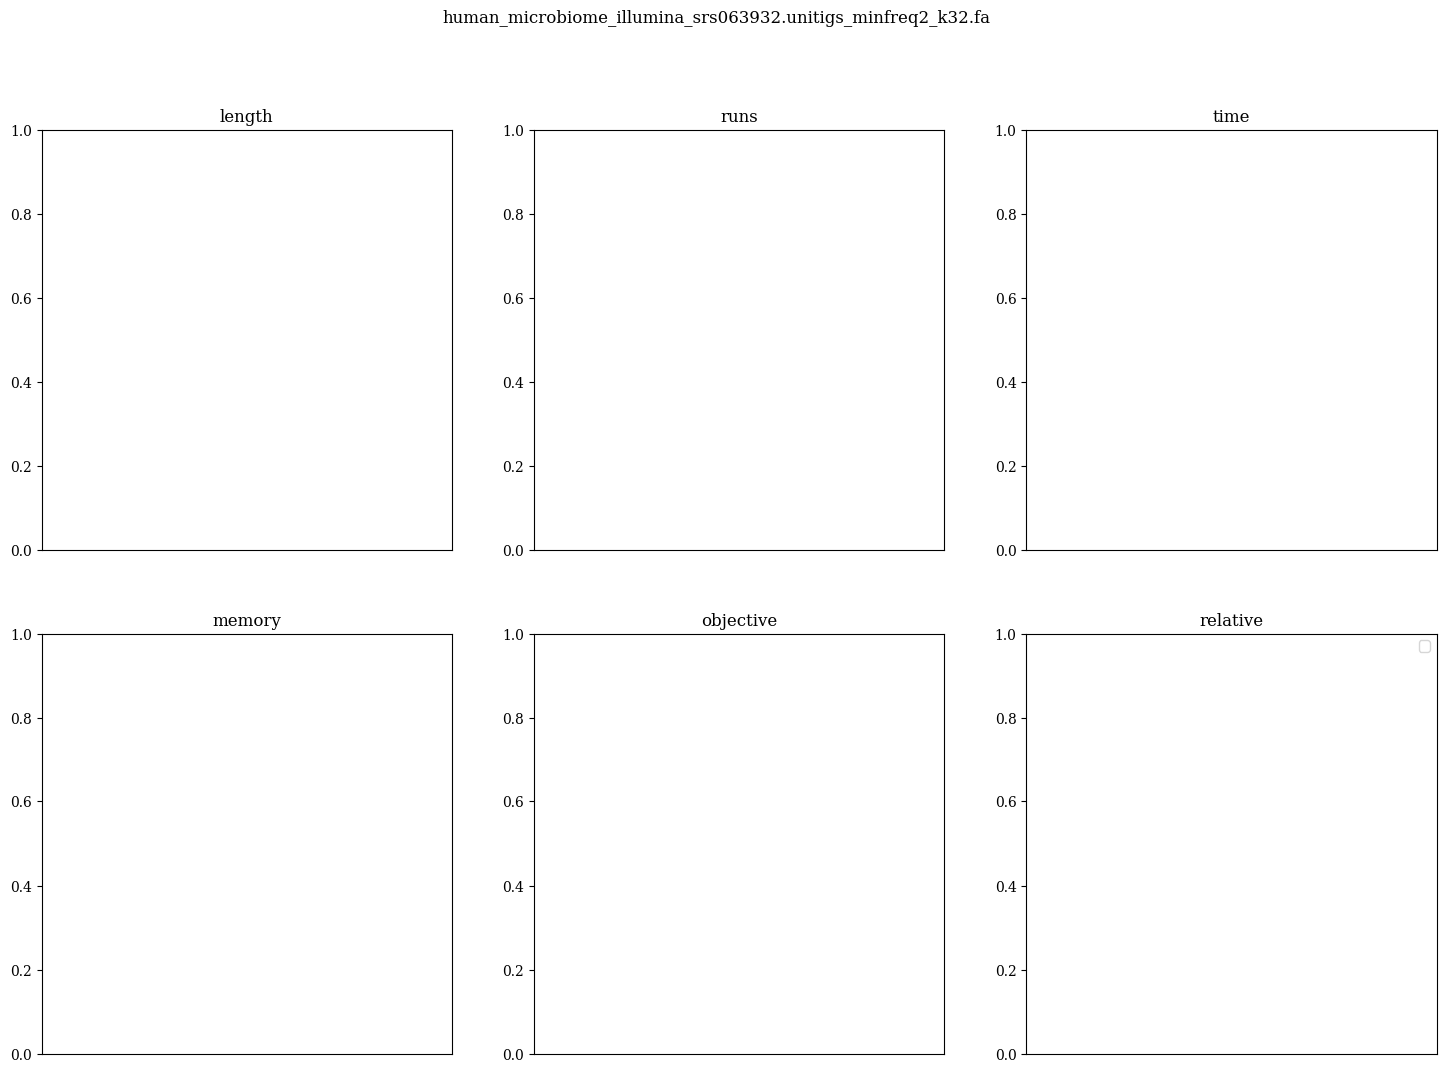

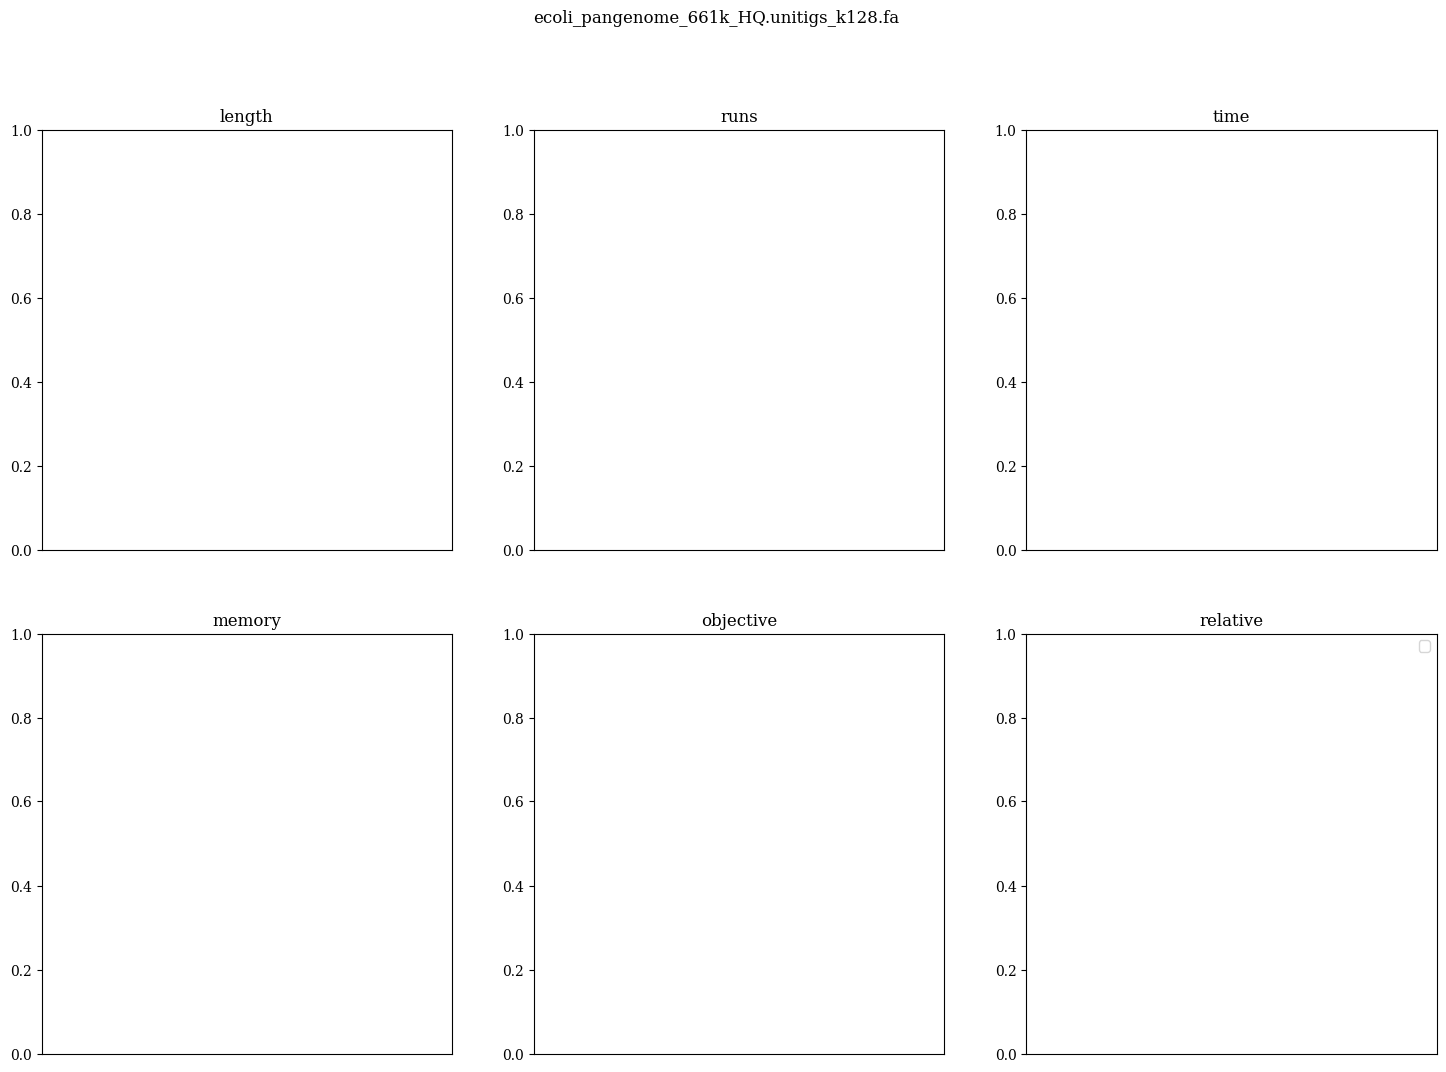

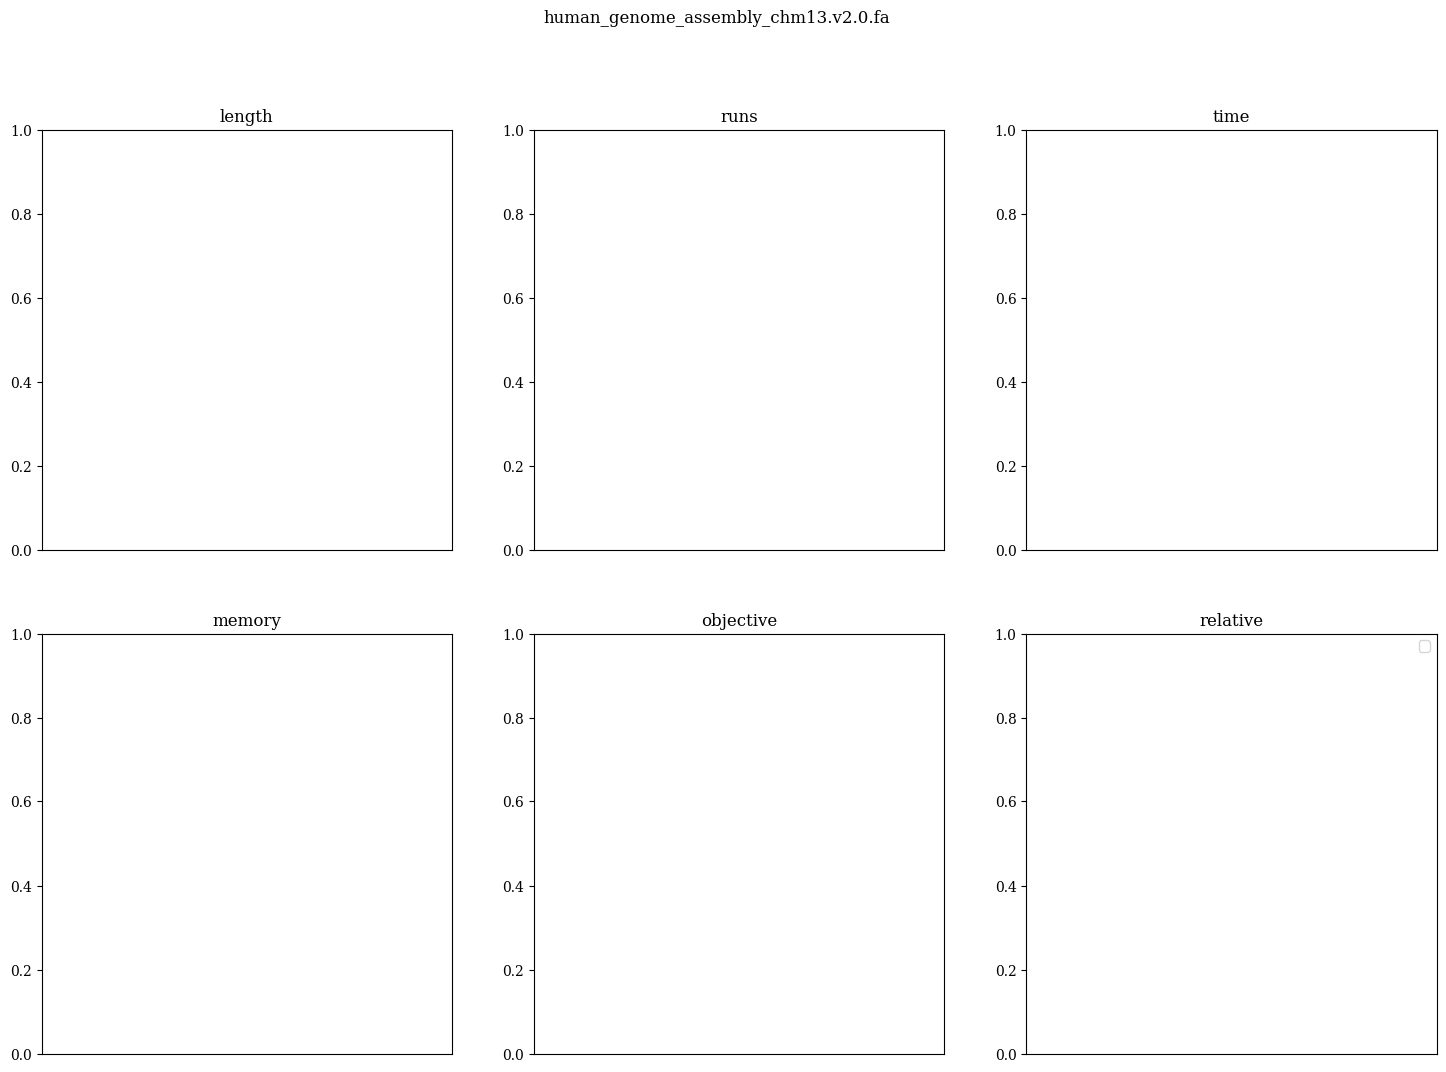

In [6]:
for inp in inputs:
    print_stats_for_input(inp)